# TP2 DA SILVA PEREIRA Théo

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 4.1 Création des matrices utilisées

## <u>Exercice 4.1</u> :
Créer une fonction point_vecteur(p) qui prend en entrée un point p de coordonnées (x,y) et retourne le vecteur [x, y, 1].

In [20]:
def point_vecteur(p):
    return np.array([p[0], p[1], 1])

point_vecteur(np.array([1, 2]))

array([1, 2, 1])

# <u>Exercice 4.2</u> : 

Créer une fonction repere_projectif(p_1,p_2,p_3,p_4) qui prend en entrée 4 points $p_i = ( x_i , y_i )$ de R² et retourne un booléen selon que les 4 points forment un repère projectif ou non.

In [21]:
def repere_projectif(p_1, p_2, p_3, p_4):
    v1 = point_vecteur(p_1)
    v2 = point_vecteur(p_2)
    v3 = point_vecteur(p_3)
    v4 = point_vecteur(p_4)

    if np.linalg.det(np.array([v1, v2, v3])) != 0:
        if np.linalg.det(np.array([v1, v2, v4])) != 0:
            if np.linalg.det(np.array([v1, v3, v4])) != 0:
                if np.linalg.det(np.array([v2, v3, v4])) != 0:
                    return True
    
    return False

p1 = np.array([0, 1])
p2 = np.array([0, 2])
p3 = np.array([0, 1])
p4 = np.array([2, 2])
print(repere_projectif(p1, p2, p3, p4)) # p1, p2, p3 sont alignés


p1 = np.array([1, 1])
p2 = np.array([1, 2])
p3 = np.array([2, 1])
p4 = np.array([2, 2])
print(repere_projectif(p1, p2, p3, p4)) # aucun point n'est aligné



False
True


# <u>Exercice 4.3</u> :
Créer une fonction matrice_A(p_1,p_2,p_3,p_4) qui prend en entrée 4 points $p_i = (x_i, y_i) de R²$ et retourne la matrice A de la Section 2.6.

In [22]:
p1 = np.array([0, 0])
p2 = np.array([1, 0])
p3 = np.array([0, 1])
p4 = np.array([1, 1])

p1_prime = np.array([0, 0])
p2_prime = np.array([3, 1])
p3_prime = np.array([2, 1])
p4_prime = np.array([5, 3/2])


def matrice_A(p_1, p_2, p_3, p_4):
    return np.transpose(np.array([point_vecteur(p_1), point_vecteur(p_2), point_vecteur(p_3)]))

matrice_A(p1, p2, p3, p4)

array([[0, 1, 0],
       [0, 0, 1],
       [1, 1, 1]])

# <u>Exercice 4.4</u> :
Créer une fonction matrice_B(p_1,p_2,p_3,p_4) qui prend en entrée 4 points $p_i = (x_i, y_i) de R²$ et retourne la matrice B de la Section 2.6.

In [23]:
def matrice_B(p_1, p_2, p_3, p_4):
    return np.linalg.inv(matrice_A(p_1, p_2, p_3, p_4))

print(matrice_B(p1, p2, p3, p4), "\n")

print(np.dot(matrice_A(p1, p2, p3, p4), matrice_B(p1, p2, p3, p4))) # A*B = I

[[-1. -1.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# <u>Exercice 4.5</u> :
Créer une fonction matrice_C(p_1,p_2,p_3,p_4) qui prend en entrée 4 points $p_i = (x_i, y_i) de R²$ et retourne la matrice C de la Section 2.6.

In [24]:
def matrice_C(p_1, p_2, p_3, p_4):
    vec_lambda = np.diag(np.dot(matrice_B(p_1, p_2, p_3, p_4), point_vecteur(p_4)))
    return np.dot(matrice_A(p_1, p_2, p_3, p_4), vec_lambda)

matrice_C(p1, p2, p3, p4)

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [-1.,  1.,  1.]])

# <u>Exercice 4.6</u> :
Créer une fonction matrice_passage(p_1,p_2,p_3,p_4,p_1,p_2,p_3,p_4) qui en prend en entrée 2 quadruplets de points, vérifie qu’ils forment des repères projectifs, si oui retourne la matrice P de la Section et sinon lève une erreur avec une commande du type
```py
if condition:
    raise ValueError("Message derreur")
```

In [25]:
def matrice_passage(p_1, p_2, p_3, p_4, p_1_prime, p_2_prime, p_3_prime, p_4_prime):
    if not repere_projectif(p_1, p_2, p_3, p_4) or not repere_projectif(p_1_prime, p_2_prime, p_3_prime, p_4_prime):
        raise ValueError("Les points ne forment pas un repère projectif")
    
    matrice_C_prime = matrice_C(p_1_prime, p_2_prime, p_3_prime, p_4_prime)
    #print(matrice_C_prime)
    
    C = matrice_C(p_1, p_2, p_3, p_4)
    #print(C)

    matrice_inv_C = np.linalg.inv(C)
    #print(matrice_inv_C)

    return np.dot(matrice_C_prime, matrice_inv_C)

matrice_passage([0, 0], [1, 0], [0, 1], [1, 1], [0, 0], [3, 1], [2, 1], [5, 3/2])

array([[ 6. , -1. ,  0. ],
       [ 2. , -0.5,  0. ],
       [ 1.5, -1. ,  0.5]])

# <u>Exercice 4.7</u> :
Créer une fonction rectification_projective_A4(p_1,p_2,p_3,p_4,image) qui prend en entrée 4 points (p_1 , p_2 , p_3 , p_4 ) d’une image (préalablement importée avec une commande du type image = plt.imread("image.jpg") et retourne une image au format A4 où le quadrilatère de sommets p_1 , p_2 , p_3 , p_4 a été redressé sur la nouvelle image au format A

1. On créera une nouvelle image noire pour commencer de taille 594*420 pixels (un A4,
c’est 29,7 cm par 21 cm, on mutliplie ces nombres par 20) avec une commande du type
nouvelle_image=np.zeros((594,420, 3), dtype = np.uint8)
2. Quelles sont les coordonnées des 4 coins de la nouvelle image ?
3. Les points p1, p2, p3 et p4 seront envoyés sur ces 4 coins. Il faudra bien faire attention
à l’ordre !
4. Pour remplir les pixels de la nouvelle image, on fera une boucle qui parcourt tous les pixels
de la nouvelle image. On appliquera la fonction g≠1 de la Section 2.6 et on récupèrera les
niveaux de couleurs de l’image initiale comme on a pu le faire dans le premier TP.
5. Tester votre code sur le fichier ds.jpg qui se trouve sur Moodle. Les 4 coins sont aux coordonnées suivantes : (539,37),(2718,1285),(120,1428),(1520,2919) si on suit l’ordre
hat gauche, bas gauche, haut droit, bas droit.

In [82]:
def g(x, y, P):
    vec = np.dot(P, point_vecteur([x, y]))
    return vec[0]/vec[2], vec[1]/vec[2]

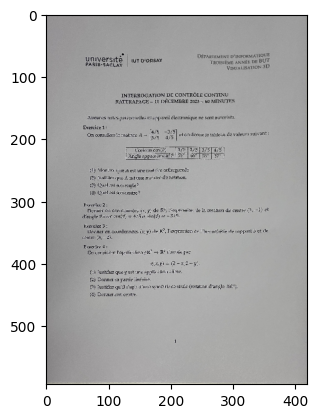

In [83]:
def rectification_projective_A4(p_1, p_2, p_3, p_4, image):
    nouvelle_image = np.zeros((594, 420, 3), dtype=np.uint8)

    P = matrice_passage(p_1, p_2, p_3, p_4, [0, 0], [0, 593], [419, 0 ], [419, 593])

    for i in range(594):
        for j in range(420):
            x, y = g(j, i, np.linalg.inv(P))
            if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:
                if 0 <= i < nouvelle_image.shape[0] and 0 <= j < nouvelle_image.shape[1]:
                    nouvelle_image[i, j] = image[int(x), int(y)]

    return nouvelle_image


image = plt.imread("ds.jpg")
image_rectifie = rectification_projective_A4([539, 37], [2718, 1285], [120, 1428], [1520, 2919], image)
plt.imshow(image_rectifie)
plt.show()

# <u>Exercice 4.8</u>

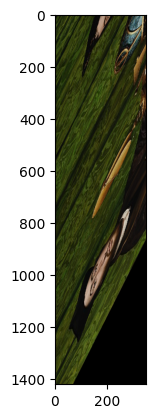

In [93]:
def anamorphose(p_1, p_2, p_3, p_4, image):
    nouvelle_image = np.zeros((1420, 350, 3), dtype=np.uint8)

    P = matrice_passage(p_1, p_2, p_3, p_4, [0, 0], [0, 1419], [349, 0], [349, 1419])

    for i in range(1420):
        for j in range(350):
            x, y = g(j, i, np.linalg.inv(P))
            if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:
                if 0 <= i < nouvelle_image.shape[0] and 0 <= j < nouvelle_image.shape[1]:
                    nouvelle_image[i, j] = image[int(y), int(x)]
    return nouvelle_image

image_ambassadeurs = plt.imread("ambassadeurs.jpg")
image_anamorphose = anamorphose([5,5], [947, 77], [469, 268], [1413, 342], image_ambassadeurs)
#plt.imshow(plt.imread("ambassadeurs.jpg"))
#plt.show()
plt.imshow(image_anamorphose)
plt.show()

# 4.9

# <u>Exercice 4.10</u>